### Load data

In [1]:
import pandas as pd
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Load dataset 
df = joblib.load('df_energy_per_atom.pkl')

# Define features and target variable
features = joblib.load('features.pkl')
print('No. of features', len(features))

df.head()

No. of features 1857


,sym_x,sym_y,sym_z,mirror_x,mirror_y,mirror_z,trans_x,trans_y,trans_z,inverse_x,...,glide_y_ohe_b,glide_y_ohe_c,glide_y_ohe_d,glide_y_ohe_n,glide_z_ohe_a,glide_z_ohe_c,glide_z_ohe_d,glide_z_ohe_e,glide_z_ohe_n,energy_per_atom
task_id,,,,,,,,,,,,,,,,,,,,,
mp-1097787,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,...,0,0,0,0,0,0,0,0,0,-5.939459
mp-1173887,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,-5.296599
mp-1174012,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,-5.441397
mp-1174016,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,-5.425975
mp-1174104,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,-5.385580


In [3]:
target = 'energy_per_atom' 

print(target)
print('Max value:', df[target].max())
print('Min value:', df[target].min())

energy_per_atom
Max value: -0.06837718
Min value: -14.07612224


### Split & Scale Features

In [4]:
!cd

c:\Users\songy\OneDrive\Documents\GBSFS4MPP_local\new_properties\8 other_properties\energy_per_atom


In [5]:
# Split dataset
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42) 

In [6]:
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/energy_per_atom/'
path_to_save = path + target + '_results/'

# Save unscaled data
joblib.dump(df_train, path_to_save + 'df_train_' + target + '.pkl')
joblib.dump(df_test, path_to_save + 'df_test_' + target + '.pkl')

['C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/energy_per_atom/energy_per_atom_results/df_test_energy_per_atom.pkl']

In [7]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                
                                
# Create pandas.Dataframe of scaled test set using scaler as defined using training set
df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
# Save 
joblib.dump(df_train, path_to_save + 'df_train_' + target + '_scaled.pkl')
joblib.dump(df_test, path_to_save + 'df_test_' + target + '_scaled.pkl')

['C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/energy_per_atom/energy_per_atom_results/df_test_energy_per_atom_scaled.pkl']

#### GBFS

In [9]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import GBFS as gb

import joblib
import pandas as pd
import numpy as np

In [10]:
# Target
target = 'energy_per_atom' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/energy_per_atom/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_scaled.pkl'

# Either a list or saved file
features = path + 'features.pkl'

problem = 'regression'

In [11]:
# Initialization 
FS = gb.GBFS(
            path_to_file = path_to_file, 
            path_to_save = path_to_save, 
            target = target,
            features = features,
            oversampled_it = False, 
            problem = problem
            )

Name of target column:  energy_per_atom
No. of exploratory features:  1857


In [12]:
# Conduct grid search to perform preliminary scan of the hyperparameter space & retrieve a trained model
FS.run(
        boosting_method = 'lightGBM', 
        cv_folds = 10
        )

Model employed:  lightGBM
Total no. of permutations: 18


   (1 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 30)]
   No. of rows in the training set: 31352
   Metric score:  -0.21054
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (2 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 40)]
   No. of rows in the training set: 31352
   Metric score:  -0.16124
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (3 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 50)]
   No. of rows in the training set: 31352
   Metric score:  -0.13005
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (4 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 30)]
   No. of rows in the training set: 31352
   Metric score:  -0.30451


   (5

LGBMRegressor(importance_type='gain', learning_rate=0.2, n_estimators=300,
              num_leaves=50, objective='regression')

Result saved as: feature_relevance_score_energy_per_atom.pkl
Figure saved as: feature_relevance_plot_energy_per_atom.png


,feature,relevance_score
0,83,174382.703095
1,406,25945.424466
2,density,14099.931704
3,O,10480.952831
4,438,7391.310229
...,...,...
1852,702,0.000000
1853,703,0.000000
1854,704,0.000000
1855,705,0.000000


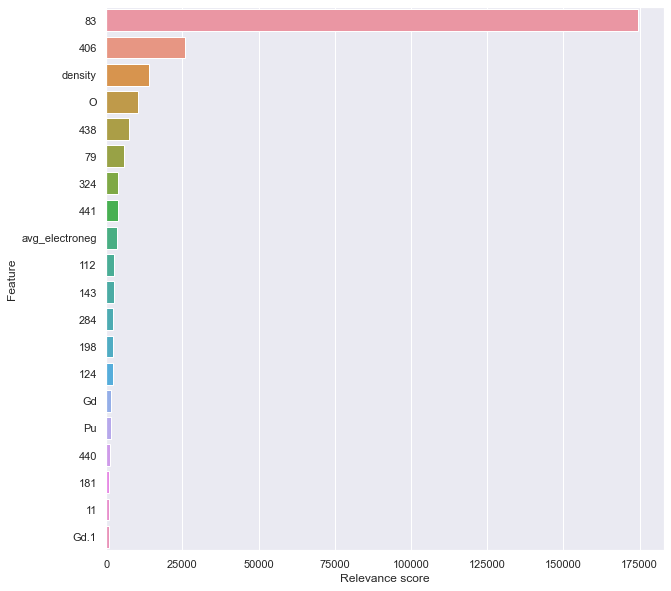

In [13]:
# Obtain feature relevance score
FS.feature_relevance(
                    plot = True, 
                    no_of_features = 20
                    )

In [14]:
# Perform recursive feature selection 
FS.recursive_selection(
                    stratify = False, 
                    oversample_technique = None, 
                    chosen_metric = 'rmse',
                    average = 'weighted',
                    no_to_terminate = 200,
                    max_no_imp = 10
                    )

   No. of rows in training set:  31352
No. of features considering:  1

n=1: mae_train=0.7680, mae_validation=0.8113 
n=1: mse_train=1.0998, mse_validation=1.1626 
n=1: rmse_train=1.0487, rmse_validation=1.0782 
n=1: r2_train=0.6899, r2_validation=0.6668 
n=1: max_error_train=6.8480, max_error_validation=5.6382 
--- 0.8347582817077637 seconds --- 

No. of features considering:  2

n=2: mae_train=0.5916, mae_validation=0.8162 
n=2: mse_train=0.7295, mse_validation=1.1806 
n=2: rmse_train=0.8541, rmse_validation=1.0865 
n=2: r2_train=0.7943, r2_validation=0.6617 
n=2: max_error_train=6.8298, max_error_validation=5.5092 
--- 0.4484076499938965 seconds --- 

No. of features considering:  3

n=3: mae_train=0.4323, mae_validation=0.6847 
n=3: mse_train=0.3970, mse_validation=0.8632 
n=3: rmse_train=0.6301, rmse_validation=0.9291 
n=3: r2_train=0.8880, r2_validation=0.7526 
n=3: max_error_train=5.3325, max_error_validation=5.5564 
--- 0.38234758377075195 seconds --- 

No. of no improvements: 

,train_mae,va_mae,train_mse,va_mse,train_rmse,va_rmse,train_r_sq,va_r_sq,train_max_error,va_max_error
no_of_features,,,,,,,,,,
1,0.768021,0.811272,1.099779,1.162603,1.048704,1.078241,0.689856,0.666827,6.847971,5.638220
2,0.591563,0.816167,0.729548,1.180570,0.854136,1.086541,0.794264,0.661678,6.829814,5.509241
3,0.432277,0.684677,0.396992,0.863168,0.630073,0.929068,0.888046,0.752638,5.332469,5.556435
4,0.356321,0.570786,0.280846,0.620707,0.529949,0.787850,0.920800,0.822121,5.212707,5.662259
5,0.311663,0.537335,0.223878,0.559439,0.473157,0.747957,0.936865,0.839679,5.331237,5.178662
...,...,...,...,...,...,...,...,...,...,...
195,0.085949,0.282461,0.015132,0.159324,0.123014,0.399154,0.995733,0.954342,1.449323,3.541973
196,0.085949,0.278984,0.015043,0.158155,0.122650,0.397687,0.995758,0.954677,1.545653,3.427907
197,0.085472,0.280093,0.014808,0.158437,0.121686,0.398042,0.995824,0.954596,1.447830,3.470930


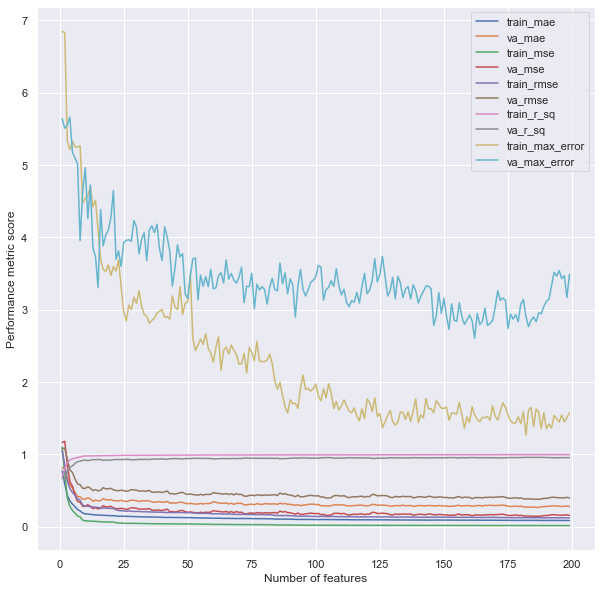

Result saved as: GBFS_convergence_plot_energy_per_atom.pkl


<Figure size 720x720 with 0 Axes>

In [15]:
# Plot the result
FS.convergence_plot()

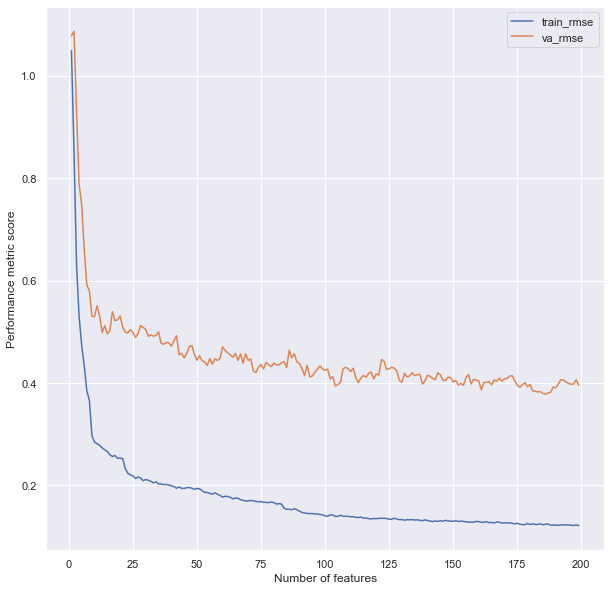

Result saved as: GBFS_convergence_plot_energy_per_atom.pkl


<Figure size 720x720 with 0 Axes>

In [16]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_rmse',
                    validation_metric = 'va_rmse'
                    )

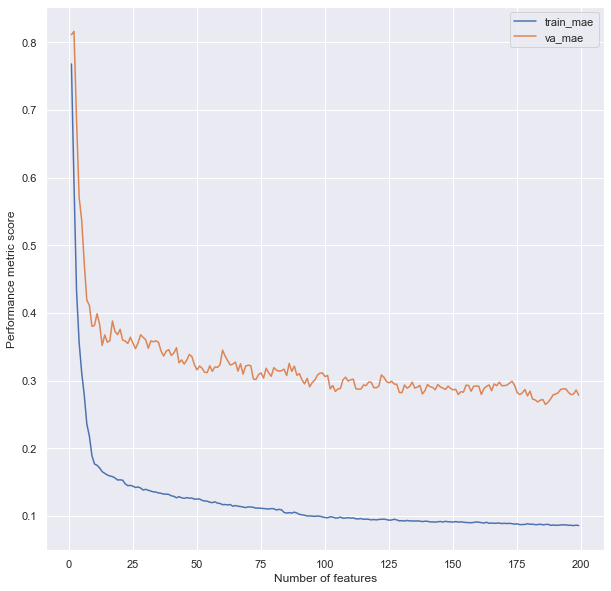

Result saved as: GBFS_convergence_plot_energy_per_atom.pkl


<Figure size 720x720 with 0 Axes>

In [17]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_mae',
                    validation_metric = 'va_mae'
                    )

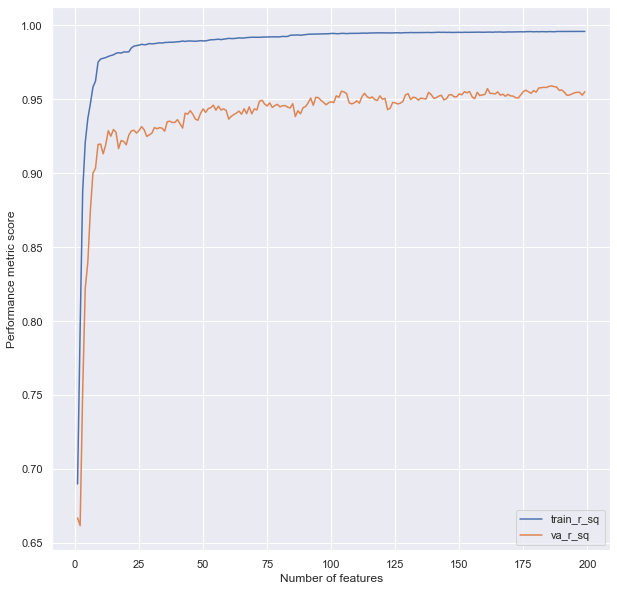

Result saved as: GBFS_convergence_plot_energy_per_atom.pkl


<Figure size 720x720 with 0 Axes>

In [18]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_r_sq',
                    validation_metric = 'va_r_sq'
                    )

In [19]:
# # Plot the result
# FS.convergence_plot(
#                     train_metric = ['train_r_sq', 'train_rmse', 'train_mae'],
#                     validation_metric = ['va_r_sq', 'va_rmse', 'va_mae']
#                     )

##### Statistical Analyses - Regression

In [20]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_analyses as fa

import joblib
import pandas as pd

In [21]:
# Target
target = 'energy_per_atom' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/energy_per_atom/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_scaled.pkl'

# Either a list or saved file
features = path + 'features.pkl'

problem = 'regression'

In [22]:
# Initialization 
analyses = fa.perform(
                    path_to_file = path_to_file, 
                    path_to_save = path_to_save, 
                    target = target,
                    features = features
                    )

Name of target column:  energy_per_atom
No. of exploratory features:  1857


In [23]:
df = analyses.remove_constant_features()
df.head()

No. of features removed:  97


,sym_x,sym_y,sym_z,mirror_x,mirror_y,mirror_z,trans_x,trans_y,trans_z,inverse_x,...,glide_y_ohe_b,glide_y_ohe_c,glide_y_ohe_d,glide_y_ohe_n,glide_z_ohe_a,glide_z_ohe_c,glide_z_ohe_d,glide_z_ohe_e,glide_z_ohe_n,energy_per_atom
task_id,,,,,,,,,,,,,,,,,,,,,
mp-1213,0.6,0.5,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.376290
mp-1177589,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.875596
mp-974862,0.6,0.5,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.014426
mp-1040467,0.6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.518402
mp-1224541,0.2,1.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.328097


In [24]:
df_anova = analyses.ANOVA_F_test(
                                problem='regression', 
                                all_features=False, 
                                csv=False
                                )

df_anova

There are:
No. of categorical features:  28
No. of numerical features:  1732 

Considering only the numerical features. 

Result saved as:  ANOVA_F_test_result_energy_per_atom_regression.pkl


,feature_names,f_statistic,f_statistic_scaled
0,83,73373.289843,1.000000e+00
1,406,61952.942143,8.443528e-01
2,438,16323.871668,2.224770e-01
3,332,14809.487216,2.018376e-01
4,79,14569.696828,1.985695e-01
...,...,...,...
1727,912,0.092502,1.231283e-06
1728,Sc,0.014150,1.634179e-07
1729,La,0.008205,8.240287e-08
1730,lanthanoid,0.005161,4.090787e-08


In [25]:
df_mi = analyses.mutual_information(
                                problem='regression', 
                                csv=False
                                )

df_mi

There are:
No. of categorical features:  28
No. of numerical features:  1732 

Result saved as: MI_result_energy_per_atom.pkl


,feature_names,MI,MI_scaled
0,406,0.957214,1.000000
1,83,0.947961,0.990333
2,250,0.789802,0.825104
3,113,0.740411,0.773506
4,124,0.725078,0.757488
...,...,...,...
1755,noble_gas,0.000051,0.000053
1756,Pa.1,0.000021,0.000022
1757,glide_z_ohe_e,0.000015,0.000016
1758,1465,0.000000,0.000000


#### Feature Engineering 

In [26]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_engineering as fe

import joblib
import pandas as pd

In [27]:
# Target
target = 'energy_per_atom' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/energy_per_atom/'
path_to_save = path + target + '_results/'
path_to_file = path + 'df_energy_per_atom.pkl'  # all data

# Either a list or saved file for the features
features = path + 'features.pkl'

problem = 'regression'

In [28]:
# Top n features from ANOVA 
df_anova = joblib.load(path_to_save + 'ANOVA_F_test_result_' + target + '_regression.pkl')

# Top n features
n = 5
anova_features = df_anova['feature_names'].tolist()[:n]

df_anova.iloc[:n, :]

,feature_names,f_statistic,f_statistic_scaled
0,83,73373.289843,1.000000
1,406,61952.942143,0.844353
2,438,16323.871668,0.222477
3,332,14809.487216,0.201838
4,79,14569.696828,0.198569


In [29]:
# Top n features from MI 
df_mi = joblib.load(path_to_save + 'MI_result_' + target + '.pkl')

# Top n features
n = 5
mi_features = df_mi['feature_names'].tolist()[:n]

df_mi.iloc[:n, :]

,feature_names,MI,MI_scaled
0,406,0.957214,1.000000
1,83,0.947961,0.990333
2,250,0.789802,0.825104
3,113,0.740411,0.773506
4,124,0.725078,0.757488


In [30]:
# Top n features from GBFS
df_gbfs = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')

# Top n features
n = 5
gbfs_features = df_gbfs['feature'].tolist()[:n]

df_gbfs.iloc[:n, :]

,feature,relevance_score
0,83,174382.703095
1,406,25945.424466
2,density,14099.931704
3,O,10480.952831
4,438,7391.310229


In [31]:
# Initialization
perform = fe.engineering(
                        path_to_file = path_to_file, 
                        path_to_save = path_to_save, 
                        target = target,
                        features = features
                        )

Name of target column:  energy_per_atom
No. of exploratory features:  1857


In [32]:
# Join the features
feature_list = anova_features + mi_features + gbfs_features

print(len(feature_list))
print(feature_list)

15
['83', '406', '438', '332', '79', '406', '83', '250', '113', '124', '83', '406', 'density', 'O', '438']


In [33]:
# Perform feature engineering
df, new_cols = perform.brute_force(feature_list = feature_list)

df.head()

,sym_x,sym_y,sym_z,mirror_x,mirror_y,mirror_z,trans_x,trans_y,trans_z,inverse_x,...,density/113,113/O,O/113,124/density,density/124,124/O,O/124,density/O,O/density,energy_per_atom
task_id,,,,,,,,,,,,,,,,,,,,,
mp-1097787,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,...,79.385135,0.094151,10.621239,506.563669,0.001974,3786.152161,0.000264,7.474188,0.133794,-5.939459
mp-1173887,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,72.857893,0.104518,9.567699,561.909115,0.001780,4278.929936,0.000234,7.614986,0.131320,-5.296599
mp-1174012,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,78.654253,0.104518,9.567699,520.499687,0.001921,4278.929936,0.000234,8.220812,0.121642,-5.441397
mp-1174016,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,77.108137,0.104518,9.567699,530.936365,0.001883,4278.929936,0.000234,8.059214,0.124082,-5.425975
mp-1174104,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,75.914427,0.104518,9.567699,539.285031,0.001854,4278.929936,0.000234,7.934450,0.126033,-5.385580


In [34]:
perform.save()

Result saved as: df_energy_per_atom_engineered_features.pkl
Result saved as: features_energy_per_atom_engineered.pkl
Result saved as: df_train_energy_per_atom_engineered.pkl
Result saved as: df_test_energy_per_atom_engineered.pkl


#### Multi-Collinearity Reduction

In [35]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import multicollinearity_reduction as mr

import joblib
import pandas as pd
import numpy as np

In [36]:
# Target
target = 'energy_per_atom' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/energy_per_atom/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
n = 200 # Most relevant features defined using the GBFS result

gbfs_cols = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')['feature'].tolist()[:n]
new_cols = joblib.load(path_to_save + 'features_' + target + '_engineered.pkl')
features = gbfs_cols + new_cols

problem = 'regression'

print(len(gbfs_cols))
print(len(new_cols))
len(features)

200
90


290

In [37]:
# Initialize module with path_to_file and path_to_save
data = mr.multicollinearity_reduction(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features 
                                        )

Name of target column:  energy_per_atom
No. of exploratory features:  290


In [38]:
# Remove features with correlation coeff greather than the threshold
col_corr = data.correlation_analysis(threshold = 0.85)
new_features = data.apply_correlation_filter()

Identified correlated features
No. of features remaining:  156
Features saved as: features_selected_from_correlation_analysis_energy_per_atom.pkl


Figure saved as: Dendrogram_energy_per_atom.png


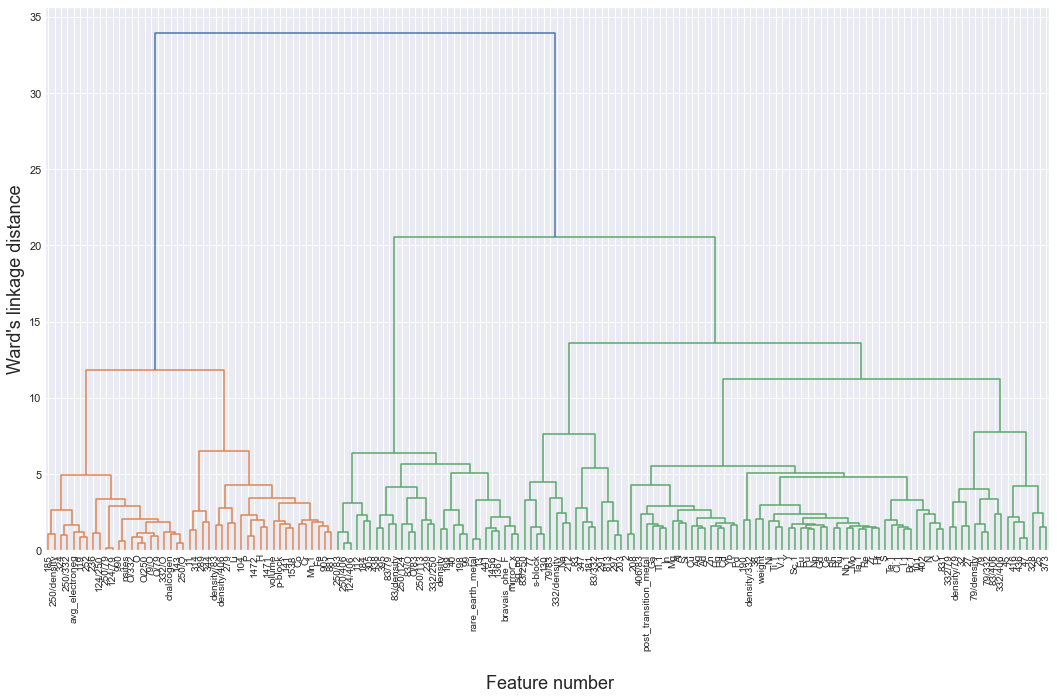

In [39]:
# Perform hierarchical cluster analysis & create the corresponding dendrogram 
data.hierarchical_cluster_analysis()

In [40]:
# Select features based on the given linkage threshold
threshold_list = [1, 2, 3, 4, 5]

for i in threshold_list:
    final_features = data.apply_linkage_threshold(threshold = i)

Number of features remaining:  144
Features saved as features_selected_from_hierarchical_analysis_energy_per_atom_threshold_1.pkl
Number of features remaining:  61
Features saved as features_selected_from_hierarchical_analysis_energy_per_atom_threshold_2.pkl
Number of features remaining:  35
Features saved as features_selected_from_hierarchical_analysis_energy_per_atom_threshold_3.pkl
Number of features remaining:  23
Features saved as features_selected_from_hierarchical_analysis_energy_per_atom_threshold_4.pkl
Number of features remaining:  15
Features saved as features_selected_from_hierarchical_analysis_energy_per_atom_threshold_5.pkl


In [41]:
# threshold_list = np.linspace(3, 4, 6)

# for i in threshold_list:
#     final_features = data.apply_linkage_threshold(threshold = i)

#### Recursive Feature Elimination

In [42]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import recursive_feature_elimination as rfe

import joblib
import pandas as pd

In [43]:
# Target
target = 'energy_per_atom' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/energy_per_atom/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_2.pkl')

scaled = False

problem = 'regression'

In [44]:
# Initialize module with path_to_file and path_to_save
run = rfe.recursive_feature_elimination(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features,
                                        scaled = False,
                                        problem = problem
                                        )

Target: energy_per_atom
No. of features: 61


In [45]:
# Run RFE
estimator = run.base_model(boosting_method = 'lightGBM')
RFE_features = run.perform()

Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 fe

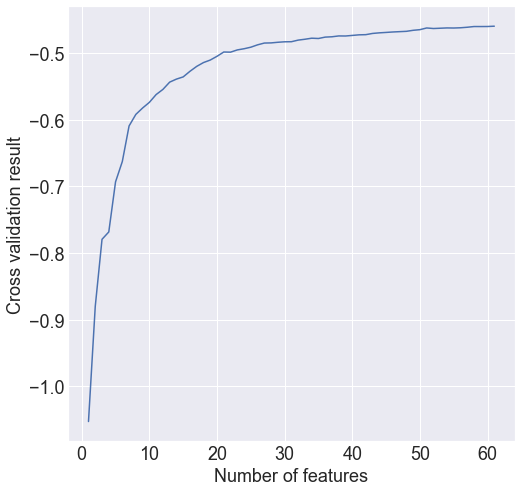

Figure saved as: RFE_plot_energy_per_atom.png


In [46]:
# Plot figure
run.RFE_plot()

#### Test Dummy Model

In [1]:
### test result to find best threshold

import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.metrics import explained_variance_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Target
target = 'energy_per_atom' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/energy_per_atom/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_2.pkl')
scaled = False
print('No. of features:', len(features))

problem = 'regression'

No. of features: 61


In [3]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                

df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

In [4]:
lgbm = LGBMRegressor(
                    boosting_type ='gbdt',
                    objective='regression',
                    importance_type='gain',
                    learning_rate=0.1,
                    n_estimators=350,
                    num_leaves=40,
                    max_depth=-1,
                    random_state=42
                    )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMRegressor(importance_type='gain', n_estimators=350, num_leaves=40,
              objective='regression', random_state=42)

In [5]:
# Predict
predicted_target = lgbm.predict(df_test[features])

# Generate table of results
id_index = df_test.index.tolist()

df_pred = pd.DataFrame({'task_id': id_index,
                        'act_target': df_test[target].values.reshape(1, -1).ravel(),
                        'pred_target': predicted_target
                        })

# Eliminate zeros (?)
df_pred['adj_pred_target'] = df_pred['pred_target']
df_pred['adj_pred_target'] = df_pred['adj_pred_target'].apply(lambda x: 0 if x < 0 else x)

# Define variables
y_test = df_pred['act_target']
y_pred_adj = df_pred['adj_pred_target']
y_pred = df_pred['pred_target']

In [6]:
print('Max value:', df_test[target].max())
print('Min value:', df_test[target].min())

Max value: -0.21921227
Min value: -13.98852267


In [7]:
def plot(df_pred, adj=False):
        # Plot results
        max_value = 1
        min_value = -15

        X = df_pred['act_target']
        if adj is True:
                Y = df_pred['adj_pred_target']
        else:
                Y = df_pred['pred_target']

        # Stats
        results = sm.OLS(Y,sm.add_constant(X)).fit()
        print(results.summary())

        # Figure
        fig = plt.figure(figsize=(10, 10)) #, dpi=100, facecolor='w', edgecolor='k')
        gs = GridSpec(4, 4)

        ax_scatter = fig.add_subplot(gs[1:4, 0:3])
        ax_hist_y = fig.add_subplot(gs[0,0:3])
        ax_hist_x = fig.add_subplot(gs[1:4, 3])


        fontsize = 18

        # Predicted vs Actual
        ax_scatter.plot(X, Y, 'o', markersize=6, color='black', alpha=0.1)

        offset = 0.15
        # line of best fit
        linear_fit = np.linspace(min_value-offset, max_value-offset, 10)
        ax_scatter.plot(linear_fit, linear_fit*results.params[1] + results.params[0], '-.', color='tab:blue', alpha=0.7)

        # Ideal y=x 
        y = x = np.linspace(min_value-offset, max_value-offset, 10)
        ax_scatter.plot(x, y, '--', color='red', alpha=0.7)

        ticks = np.linspace(min_value, max_value, 5)

        onset = 0.5
        ax_scatter.set_xlabel('DFT Calculation of Energy ($eV/atom$)', fontsize=fontsize)
        ax_scatter.set_ylabel('ML Prediction of Energy ($eV/atom$)', fontsize=fontsize)
        ax_scatter.tick_params(axis='both', which='both', labelsize=fontsize, direction="in")
        ax_scatter.set_xlim(min_value-onset, max_value+onset)
        ax_scatter.set_ylim(min_value-onset, max_value+onset)
        ax_scatter.set_xticks(ticks)
        ax_scatter.set_yticks(ticks)

        ax_hist_x.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelleft=False)
        ax_hist_x.set_xlabel('Count', fontsize=fontsize)
        ax_hist_x.set_ylim(min_value-onset, max_value+onset)
        ax_hist_x.set_xticks([0, 300, 600])
        ax_hist_x.set_yticks(ticks)

        ax_hist_y.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelbottom=False)
        ax_hist_y.set_ylabel('Count', fontsize=fontsize)
        ax_hist_y.set_xlim(min_value-onset, max_value+onset)
        ax_hist_y.set_yticks([0, 300, 600])
        ax_hist_y.set_xticks(ticks)

        # Distribution plots
        alpha = 0.4
        histtype = 'bar' #'step' bar
        color = 'black' #'tab:grey'
        bins = 60 #70

        ax_hist_y.hist(
                        y_pred_adj, 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )
        ax_hist_x.hist(
                        y_test, 
                        orientation='horizontal', 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )


        #Text in figure
        font1 = {'family': 'DejaVu Sans',
                'color':  'red',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font2 = {'family': 'DejaVu Sans',
                'color':  'tab:blue',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font3 = {'family': 'DejaVu Sans', #'serif',
                'color':  'black',
                'weight': 'normal',
                'size': fontsize-3,
                }

        ax_scatter.text(-9, -5, r'$y = x$', fontdict=font1)
        ax_scatter.text(-5, -8, r'$y = ' + str(round(results.params[1],3)) + 'x ' + str(round(results.params[0],3)) + '$', fontdict=font2)

        x_co = -7
        y_co = -15
        r2 = r2_score(X, Y)
        ax_scatter.text(x_co, y_co+1.5, r'$R^{2}$ = ' + str(round(r2,3)), fontdict=font3)

        mae = mean_absolute_error(X, Y)
        ax_scatter.text(x_co, y_co+0.8, r'$MAE$ = ' + str(round(mae,3)) + '$eV/atom$', fontdict=font3)

        mse = mean_squared_error(X, Y, squared=False)
        ax_scatter.text(x_co, y_co, r'$RMSE$ = ' + str(round(mse,3)) + '$eV/atom$', fontdict=font3)

        #final_figure
        #fig.savefig('final_regression_mag_v1.png', dpi = 500, bbox_inches="tight")

        plt.show()

        print('m = ', results.params[1])
        print('c = ', results.params[0], '\n')

        print('MAE: ', mean_absolute_error(X, Y))
        print('MSE: ', mean_squared_error(X, Y))
        print('RMSE: ', mean_squared_error(X, Y, squared=False))
        print('R-squared: ', r2_score(X, Y))
        print('Max error: ', max_error(X, Y))
        print('Explained_variance_score: ', explained_variance_score(X, Y, multioutput='variance_weighted'))

                            OLS Regression Results                            
Dep. Variable:            pred_target   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 2.305e+05
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:46:52   Log-Likelihood:                -4121.2
No. Observations:                9798   AIC:                             8246.
Df Residuals:                    9796   BIC:                             8261.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2501      0.012    -20.598      0.0

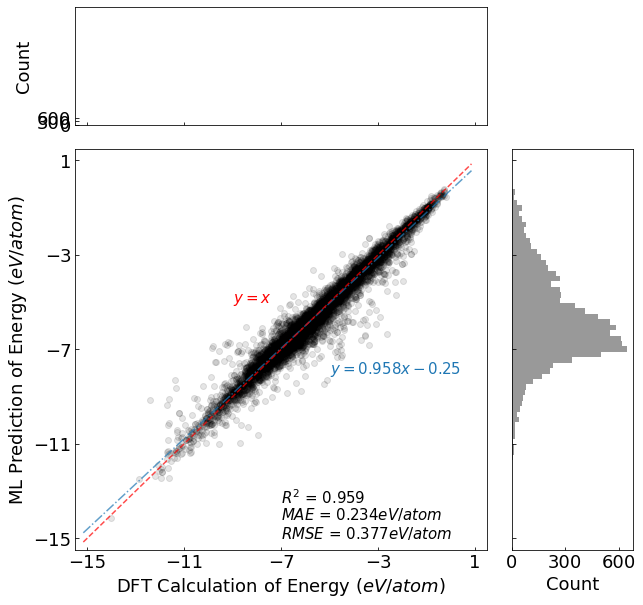

m =  0.9577205889794226
c =  -0.25005188174330034 

MAE:  0.23448397998383017
MSE:  0.14204134652001235
RMSE:  0.376883730771192
R-squared:  0.9592167699935131
Max error:  3.7137090400473936
Explained_variance_score:  0.9592244505611573


In [8]:
plot(df_pred, adj=False)

[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

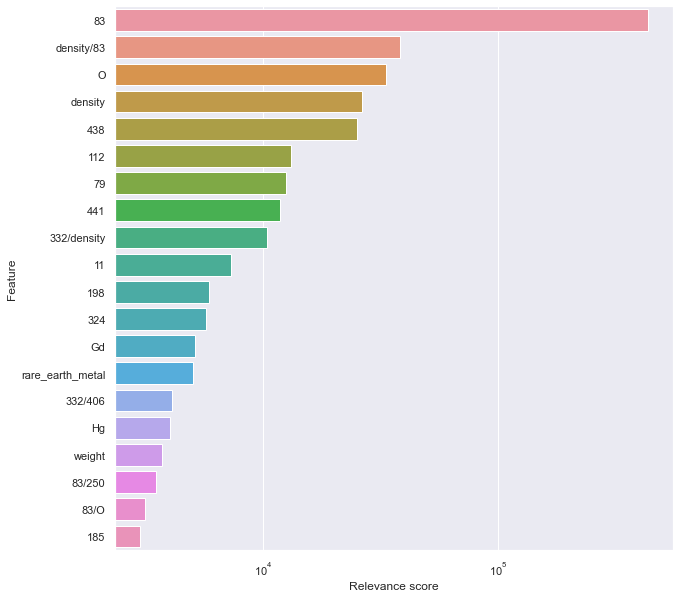

In [9]:
import seaborn as sns

# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)


#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})

# Number of features to plot
no_of_features = 20

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set_xscale("log")
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

#### Bayesian Optimization 

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import optimization as opt

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 'energy_per_atom' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/energy_per_atom/'
path_to_save = path + target + '_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'

path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'regression'

scaled = False

In [3]:
# Initialization
final_stage = opt.optimization(
                            path_to_train_data = path_to_train_data,
                            path_to_test_data = path_to_test_data,
                            path_to_save = path_to_save,
                            features = path_to_features,
                            target = target,
                            problem = problem,
                            scaled = scaled
                            )

Name of target column:  energy_per_atom
No. of exploratory features:  61


In [4]:
# Choose ML model
final_stage.base_model(boosting_method = 'lightGBM')

LGBMRegressor(importance_type='gain', random_state=42)

In [5]:
# Define hyperparameters; range should be edited directly from the script
final_stage.set_hyperparameters()

(['learning_rate', 'n_estimators', 'num_leaves'],
 [Real(low=0.01, high=1.0, prior='log-uniform', transform='identity'),
  Integer(low=100, high=800, prior='uniform', transform='identity'),
  Integer(low=10, high=100, prior='uniform', transform='identity')])

In [6]:
# optimization_method: dummy_minimize, gp_minimize, gbrt_minimize, forest_minimize
final_stage.run(optimization_method = 'bayesian')

Iteration No: 1 started. Evaluating function at random point.

 {'learning_rate': 0.27763695871375105, 'n_estimators': 480, 'num_leaves': 65} 

Score:  0.38169694737616633 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 6.0974
Function value obtained: 0.3817
Current minimum: 0.3817
Iteration No: 2 started. Evaluating function at random point.

 {'learning_rate': 0.05162724665604273, 'n_estimators': 742, 'num_leaves': 36} 

Score:  0.3905615579440536 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 6.4599
Function value obtained: 0.3906
Current minimum: 0.3817
Iteration No: 3 started. Evaluating function at random point.

 {'learning_rate': 0.034175565774433966, 'n_estimators': 730, 'num_leaves': 68} 

Score:  0.3821739834640289 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 9.5182
Function value obtained: 0.3822
Current minimum: 0.3817
Iteration No: 4 started. Evaluating function at random point.

 {'learning_rate': 0.08

Saved: Optimisation_result_energy_per_atom.png


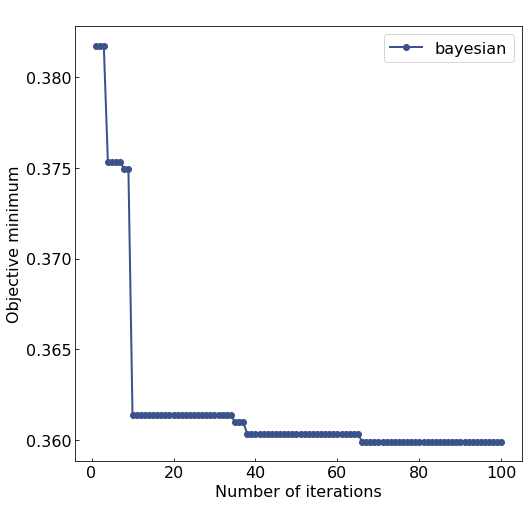

In [7]:
# Plot convergence plot
final_stage.convergence_plot()

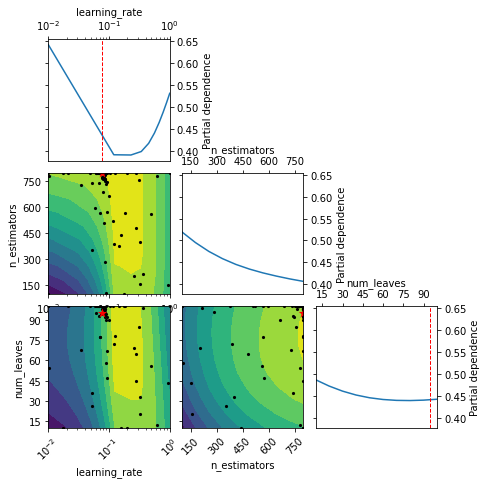

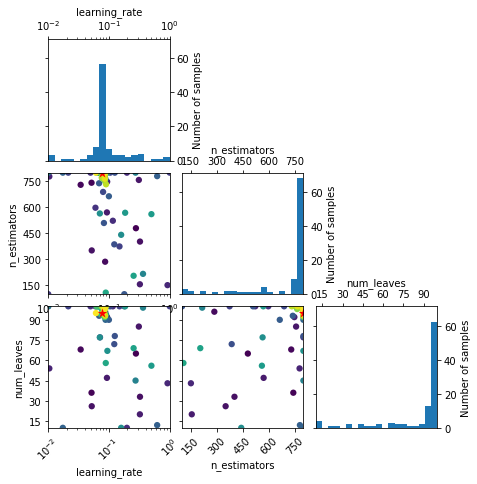

In [8]:
# objective and evaluation plot
final_stage.objective_plot()

In [9]:
# Train model with optimal hyperparameter identified
final_stage.train_model()

LGBMRegressor(importance_type='gain', learning_rate=0.07705360286856518,
              n_estimators=800, num_leaves=95, random_state=42)

                            OLS Regression Results                            
Dep. Variable:            pred_target   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 2.777e+05
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        16:23:54   Log-Likelihood:                -3289.0
No. Observations:                9798   AIC:                             6582.
Df Residuals:                    9796   BIC:                             6596.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2029      0.011    -

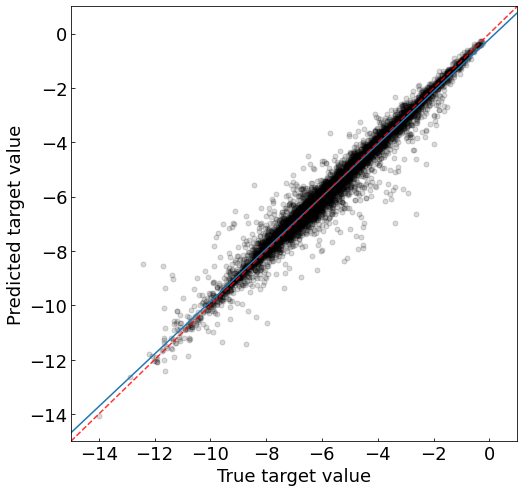

Saved: regression_plot_energy_per_atom.png


In [10]:
# Evaluate model using test set
final_stage.evaluate(
                    strategy = 'weighted', 
                    adjusted = False, 
                    max_value = 1,
                    min_value = -15
                    )


### Final Figure

In [1]:
import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.metrics import explained_variance_score,mean_squared_error

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Target
target = 'energy_per_atom' 

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/energy_per_atom/'
path_to_save = path + target + '_results/'

# Features
features = joblib.load(path_to_save + 'features_selected_from_RFE_' + target + '.pkl')
print(len(features))

# Path to training data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

problem = 'regression'

scaled = False

61


In [3]:
lgbm = LGBMRegressor(
                    boosting_type ='gbdt',
                    objective=problem,
                    importance_type='gain',
                    learning_rate=0.07705360286856518,
                    n_estimators=800,
                    num_leaves=95,
                    max_depth=-1,
                    random_state=42
                    )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMRegressor(importance_type='gain', learning_rate=0.07705360286856518,
              n_estimators=800, num_leaves=95, objective='regression',
              random_state=42)

In [4]:
# Predict
predicted_target = lgbm.predict(df_test[features])

# Generate table of results
id_index = df_test.index.tolist()

df_pred = pd.DataFrame({'task_id': id_index,
                        'act_target': df_test[target].values.reshape(1, -1).ravel(),
                        'pred_target': predicted_target
                        })

# Eliminate zeros (?)
df_pred['adj_pred_target'] = df_pred['pred_target']
df_pred['adj_pred_target'] = df_pred['adj_pred_target'].apply(lambda x: 0 if x < 0 else x)

# Define variables
y_test = df_pred['act_target']
y_pred_adj = df_pred['adj_pred_target']
y_pred = df_pred['pred_target']

In [5]:
print('Max value:', df_test[target].max())
print('Min value:', df_test[target].min())

Max value: -0.21921227
Min value: -13.98852267


In [6]:
def plot(df_pred, adj=False):
        # Plot results
        max_value = 1
        min_value = -15

        X = df_pred['act_target']
        if adj is True:
                Y = df_pred['adj_pred_target']
        else:
                Y = df_pred['pred_target']

        # Stats
        results = sm.OLS(Y,sm.add_constant(X)).fit()
        print(results.summary())

        # Figure
        fig = plt.figure(figsize=(10, 10), dpi=500) #, dpi=100, facecolor='w', edgecolor='k')
        gs = GridSpec(4, 4)

        ax_scatter = fig.add_subplot(gs[1:4, 0:3])
        ax_hist_y = fig.add_subplot(gs[0,0:3])
        ax_hist_x = fig.add_subplot(gs[1:4, 3])


        fontsize = 18

        # Predicted vs Actual
        ax_scatter.plot(X, Y, 'o', markersize=6, color='black', alpha=0.1)

        offset = 0.15
        # line of best fit
        linear_fit = np.linspace(min_value-offset, max_value-offset, 10)
        ax_scatter.plot(linear_fit, linear_fit*results.params[1] + results.params[0], '-.', color='tab:blue', alpha=0.7)

        # Ideal y=x 
        y = x = np.linspace(min_value-offset, max_value-offset, 10)
        ax_scatter.plot(x, y, '--', color='red', alpha=0.7)

        ticks = np.linspace(min_value, max_value, 5)

        onset = 0.5
        ax_scatter.set_xlabel('DFT Calculation of Energy ($eV/atom$)', fontsize=fontsize)
        ax_scatter.set_ylabel('ML Prediction of Energy ($eV/atom$)', fontsize=fontsize)
        ax_scatter.tick_params(axis='both', which='both', labelsize=fontsize, direction="in")
        ax_scatter.set_xlim(min_value-onset, max_value+onset)
        ax_scatter.set_ylim(min_value-onset, max_value+onset)
        ax_scatter.set_xticks(ticks)
        ax_scatter.set_yticks(ticks)

        ax_hist_x.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelleft=False)
        ax_hist_x.set_xlabel('Count', fontsize=fontsize)
        ax_hist_x.set_ylim(min_value-onset, max_value+onset)
        ax_hist_x.set_xticks([0, 300, 600])
        ax_hist_x.set_yticks(ticks)

        ax_hist_y.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelbottom=False)
        ax_hist_y.set_ylabel('Count', fontsize=fontsize)
        ax_hist_y.set_xlim(min_value-onset, max_value+onset)
        ax_hist_y.set_yticks([0, 300, 600])
        ax_hist_y.set_xticks(ticks)

        # Distribution plots
        alpha = 0.4
        histtype = 'bar' #'step' bar
        color = 'black' #'tab:grey'
        bins = 60 #70

        ax_hist_y.hist(
                        Y, 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )
        ax_hist_x.hist(
                        Y, 
                        orientation='horizontal', 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )


        #Text in figure
        font1 = {'family': 'DejaVu Sans',
                'color':  'red',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font2 = {'family': 'DejaVu Sans',
                'color':  'tab:blue',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font3 = {'family': 'DejaVu Sans', #'serif',
                'color':  'black',
                'weight': 'normal',
                'size': fontsize-3,
                }

        ax_scatter.text(-9, -5, r'$y = x$', fontdict=font1)
        ax_scatter.text(-5, -8, r'$y = ' + str(round(results.params[1],3)) + 'x ' + str(round(results.params[0],3)) + '$', fontdict=font2)

        x_co = -7
        y_co = -15
        r2 = r2_score(X, Y)
        ax_scatter.text(x_co, y_co+1.5, r'$R^{2}$ = ' + str(round(r2,3)), fontdict=font3)

        mae = mean_absolute_error(X, Y)
        ax_scatter.text(x_co, y_co+0.8, r'$MAE$ = ' + str(round(mae,3)) + '$eV/atom$', fontdict=font3)

        mse = mean_squared_error(X, Y, squared=False)
        ax_scatter.text(x_co, y_co, r'$RMSE$ = ' + str(round(mse,3)) + '$eV/atom$', fontdict=font3)

        #final_figure
        #fig.savefig('final_regression_mag_v1.png', dpi = 500, bbox_inches="tight")

        plt.show()

        print('m = ', results.params[1])
        print('c = ', results.params[0], '\n')

        print('MAE: ', mean_absolute_error(X, Y))
        print('MSE: ', mean_squared_error(X, Y))
        print('RMSE: ', mean_squared_error(X, Y, squared=False))
        print('R-squared: ', r2_score(X, Y))
        print('Max error: ', max_error(X, Y))
        print('Explained_variance_score: ', explained_variance_score(X, Y, multioutput='variance_weighted'))

                            OLS Regression Results                            
Dep. Variable:            pred_target   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 2.799e+05
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:47:20   Log-Likelihood:                -3267.5
No. Observations:                9798   AIC:                             6539.
Df Residuals:                    9796   BIC:                             6553.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1941      0.011    -17.446      0.0

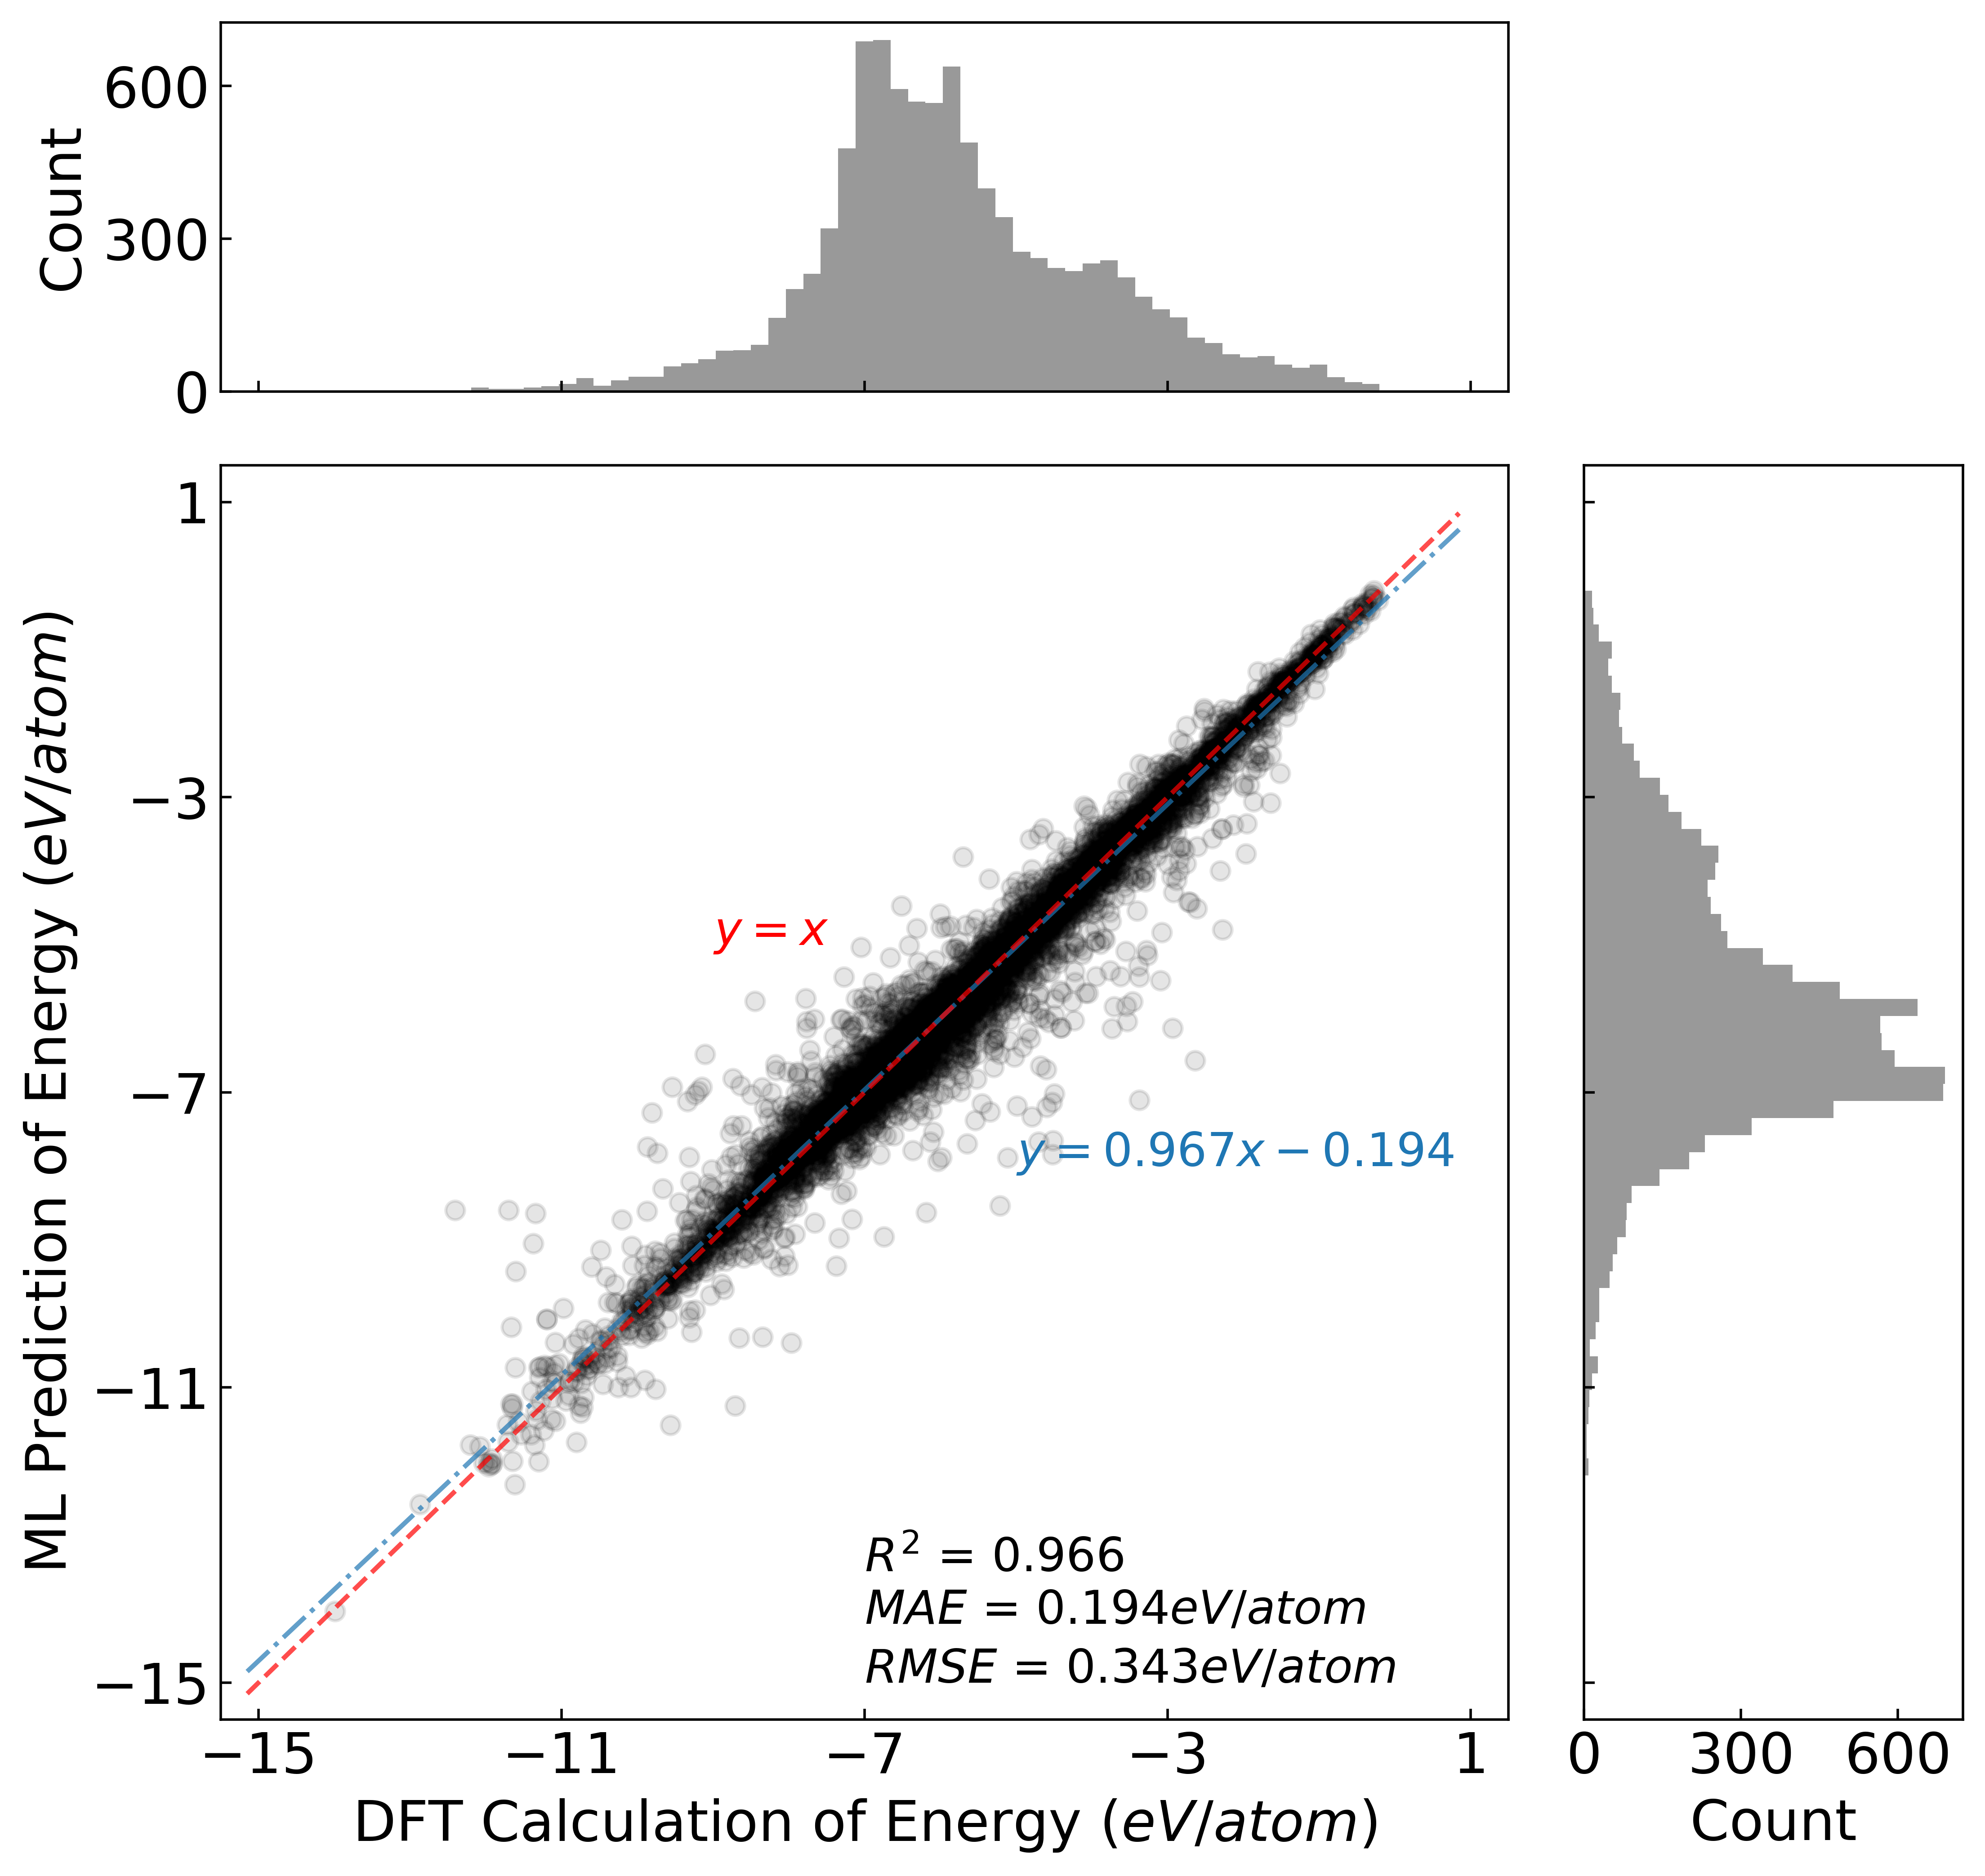

m =  0.9673609917372075
c =  -0.19412597468500412 

MAE:  0.19371663887817916
MSE:  0.11781021036701808
RMSE:  0.34323492008683804
R-squared:  0.9661740681553328
Max error:  3.931392477780184
Explained_variance_score:  0.9661814858781349


In [7]:
plot(df_pred, adj=False)

[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

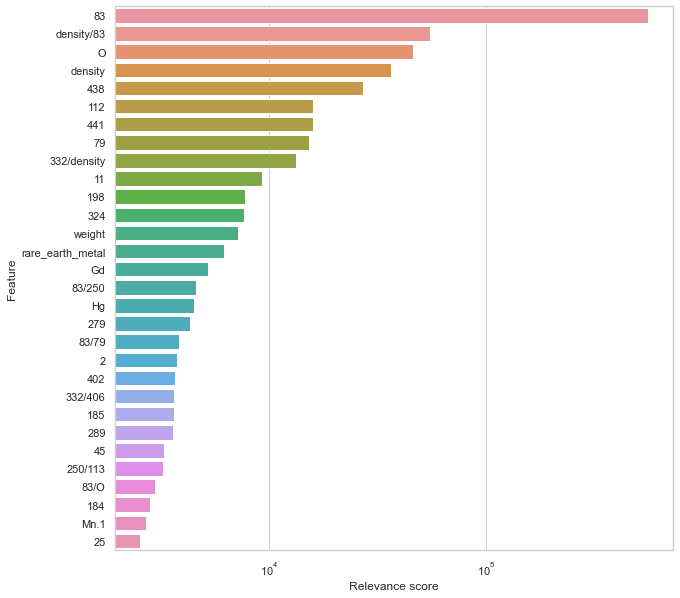

In [8]:
import seaborn as sns

# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)

#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})
sns.set_style("whitegrid")

# Number of features to plot
no_of_features = 30

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set_xscale("log")
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

# plt.savefig('feature_relevance_plot_experimental_bayesian_scaffold_split_v2.png', dpi = 300)